In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import signal

In [76]:
def create_sawtooth(noise_level, offset):
    x = np.linspace(0,1,12000)
    noise = np.random.normal(0,1, 12000)
    return signal.sawtooth(2 * np.pi * 600 * x) + noise_level*noise + offset

In [77]:
def create_sine(time_len, freq, amplitude, noise_level, offset):
    x = np.linspace(0, freq * np.pi, 50)
    noise = np.random.normal(0,1, time_len)
    return amplitude*np.sin(np.tile(x, int(time_len/50))) + noise_level*noise + offset

## Create Sinus Curve with Gausian Noise

In [79]:
# Create Sine Wave
sinewave = create_sine(12000, 2, 10, 0.4,0)
sawtooth = create_sawtooth(0.1, 0)
time = range(len(sinewave))

# Save Sine Wave as .csv
df = pd.DataFrame(data={"ID":time, "sine_signal":sinewave})
df["sawtooth_signal"] = sawtooth
df.to_csv("./artifical_2_signals.csv", index=False, sep=",")

### Create Sensor Dataset and save to csv file

In [86]:
original = pd.read_csv("../vega_shrinkwrapper_original/NewBlade/NewBlade001_short.csv", header=0)
sine = pd.read_csv("./sine_wave/sine_wave.csv", header=0, sep=";")
original["sine"]= sine["value"]

original.to_csv("../../data/artifical_signals/NewBlade_with_sine.csv", index=False)

## Create Sinus Curve with several Errors
Errors will be:
- a higher level of noise
- an increase in sinusoidal amplitude
- a higher frequency
- a lower frequency
- an offset
- the interruption of the signal.

In [81]:
# Create Signal with errors
sine_with_error = []

# 0 - 249: no error
sine_with_error.append(create_sine(10250, 2, 10, 0.6, 0))

# 250 - 299: higher level of noise
sine_with_error.append(create_sine(50, 2, 10, 3, 0))

# 300 - 449: no error
sine_with_error.append(create_sine(150, 2, 10, 0.6, 0))

# 450 - 499: increase in amplitude
sine_with_error.append(create_sine(50, 2, 14, 0.6, 0))

# 500 - 749: no error
sine_with_error.append(create_sine(250, 2, 10, 0.6, 0))

# 750 - 849: higher frequency 
sine_with_error.append(create_sine(100, 4, 10, 0.6, 0))

# 850 - 1149: no error
sine_with_error.append(create_sine(300, 2, 10, 0.6, 0))

# 1150 - 1299: lower frequency 
sine_with_error.append(create_sine(150, 1, 10, 0.6, 0))

# 1300 - 1499: no error
sine_with_error.append(create_sine(200, 2, 10, 0.6, 0))

# 1500 - 1649: offset
sine_with_error.append(create_sine(150, 2, 10, 0.6, 5))

# 1650 - 1699: no error
sine_with_error.append(create_sine(50, 2, 10, 0.6, 0))

# 1700 - 1799: no signal
sine_with_error.append(np.zeros(100))

# 1800 - 1999: no error
sine_with_error.append(create_sine(200, 2, 10, 0.6, 0))

# Concatenate intervals to one signal 
signal = []
# Plot Sine Wave
for i in sine_with_error:
    signal = np.concatenate((signal, i), axis=None)
print(len(signal))
# Save Sine Wave as .csv
df = pd.DataFrame(data={"time":time, "value":signal})
df["sawtooth_signal"] = sawtooth
df.to_csv("./artifical_2_signals_errors.csv.csv", index=False, sep=",")

12000


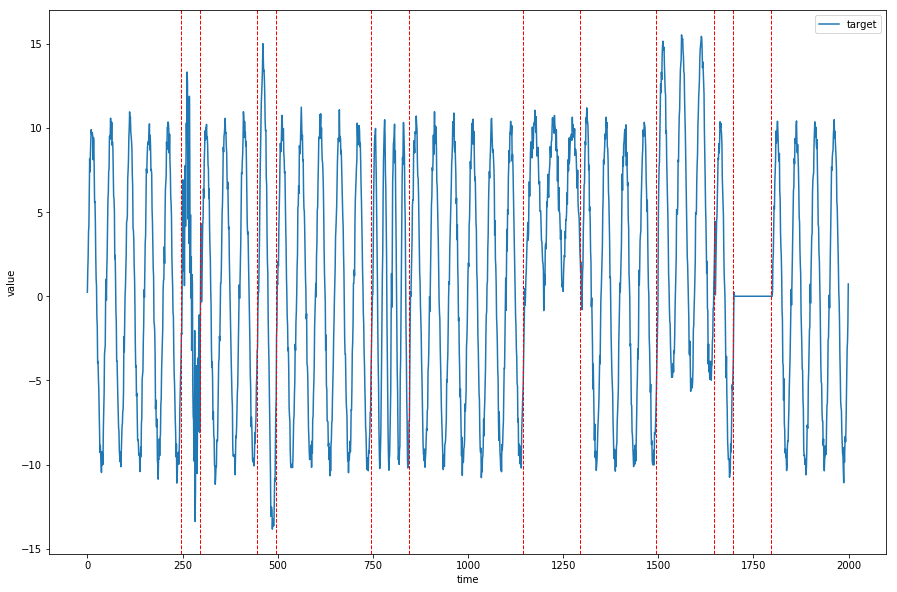

In [78]:
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=df, x="time", y="value", label="target")
plt.axvline(245, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(295, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(445, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(495, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(745, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(845, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1145, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1295, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1495, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1645, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1695, 0,2, color="r", linestyle ="--", linewidth=1)
plt.axvline(1795, 0,2, color="r", linestyle ="--", linewidth=1)
plt.show()

### Create Sensor Dataset and save to csv file

In [88]:
original = pd.read_csv("../vega_shrinkwrapper_original/NewBlade/NewBlade001_short.csv", header=0)
sine = pd.read_csv("./sine_wave/sine_wave_multiple_errors.csv", header=0, sep=";")
original["sine"]= sine["value"]

original.to_csv("../../data/artifical_signals/NewBlade_multiple_errors.csv", index=False)

## Sine Curve with degenerating frequence

2000


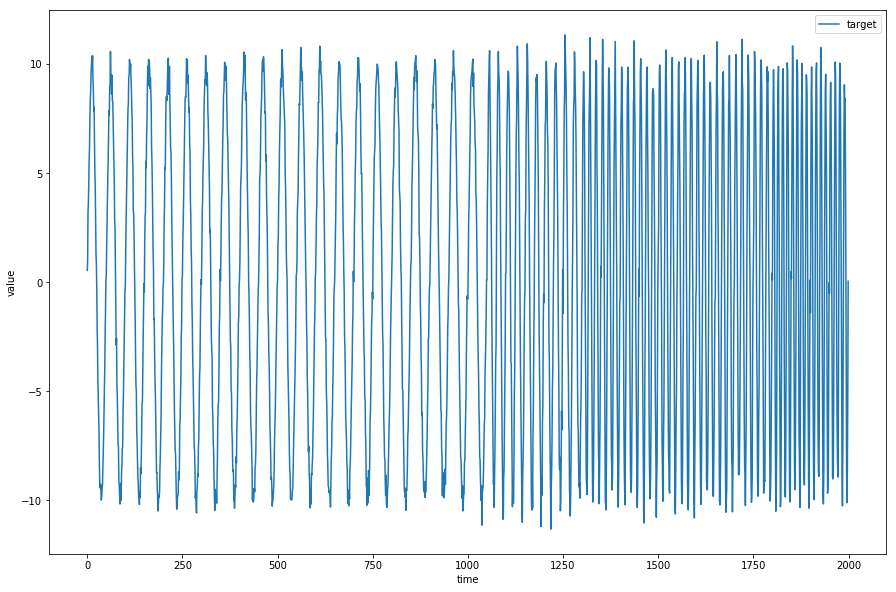

In [94]:
sine_with_error = []
for i in range(40):
    if i <=20:
        sine_with_error.append(create_sine(50, 2, 10, 0.4, 0))
    elif i<=25:
        sine_with_error.append(create_sine(50, 4, 10, 0.6, 0))
    elif i<=35:
        sine_with_error.append(create_sine(50, 6, 10, 0.6, 0))
    else:
        sine_with_error.append(create_sine(50, 8, 10, 0.6, 0))

signal=[]
time = range(2000)
# Plot Sine Wave
for i in sine_with_error:
    signal = np.concatenate((signal, i), axis=None)
print(len(signal))
df = pd.DataFrame(data={"time":time, "value":signal})
df.to_csv("./sine_wave/sine_wave_degradation_freq.csv", index=False, sep=";")
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=df.iloc[0:2000], x="time", y="value", label="target")
plt.show()

### Create Sensor Dataset and save to csv file

In [92]:
original = pd.read_csv("../vega_shrinkwrapper_original/NewBlade/NewBlade001_short.csv", header=0)
sine = pd.read_csv("./sine_wave/sine_wave_degradation_freq.csv", header=0, sep=";")
original["sine"]= sine["value"]

original.to_csv("../../data/artifical_signals/NewBlade_degradation_freq.csv", index=False)

## Sine Curve with rising offset

2000


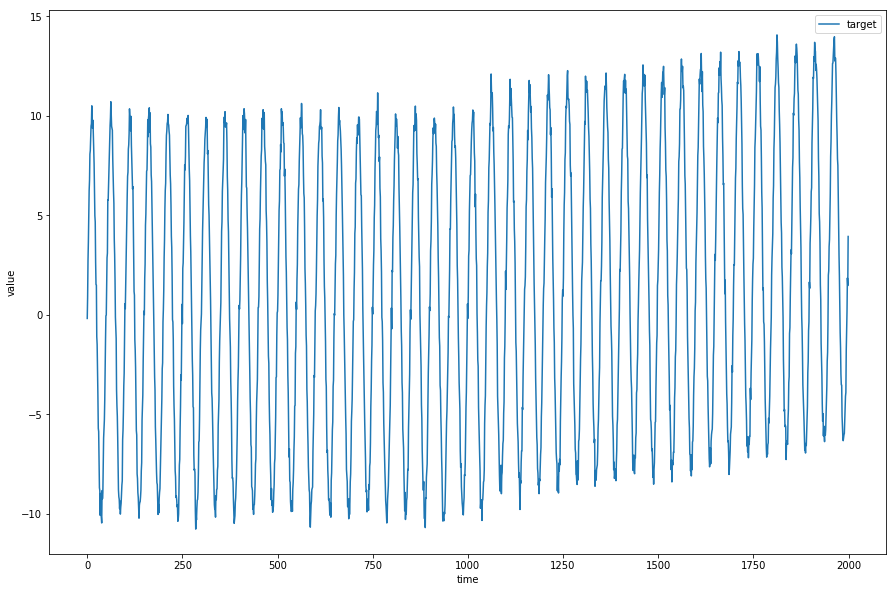

In [103]:
sine_with_error = []
for i in range(40):
    if i <=20:
        sine_with_error.append(create_sine(50, 2, 10, 0.4, 0))
    else:
        sine_with_error.append(create_sine(50, 2, 10, 0.4, (i/20)**2))

signal=[]
time = range(2000)
# Plot Sine Wave
for i in sine_with_error:
    signal = np.concatenate((signal, i), axis=None)
print(len(signal))
df = pd.DataFrame(data={"time":time, "value":signal})
df.to_csv("./sine_wave/sine_wave_degradation_offset.csv", index=False, sep=";")
fig, axes = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=df.iloc[0:2000], x="time", y="value", label="target")
plt.show()

### Create Sensor Dataset and save to csv file

In [104]:
original = pd.read_csv("../vega_shrinkwrapper_original/NewBlade/NewBlade001_short.csv", header=0)
sine = pd.read_csv("./sine_wave/sine_wave_degradation_offset.csv", header=0, sep=";")
original["sine"]= sine["value"]

original.to_csv("../../data/artifical_signals/NewBlade_degradation_offset.csv", index=False)